<a href="https://colab.research.google.com/github/dlachaud/Data201/blob/main/HotelTax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **By:**

Daniel Lachaud


"This dataset contains information on the Room Rental-Transient Tax (Hotel Tax): Section 52-16 of the Montgomery County Code, as amended, imposes a Room Rental-Transient Tax upon each and every person, who for a period of thirty or fewer days occupies, for compensation, sleeping accommodations in a public or private hotel, motel, inn, hostelry, tourist home, a residential house or a room within a house, and or any other lodging located in Montgomery County, Maryland."

The rate of the tax is 7% of the rent.

A quick glance at the variables contained in the Hotel_Tax.csv Dataset.


**Name:**	Name of the Business	

**Month:**	Filing Month	

**Quarter:**	Filing Quarter	

**Year:**	Filing Year	

**Filing Frequency:**	Either Month (M) or Quarter (Q)	

**Due Date:**	Tax Due Date based on the Filing Period	Date & Time	

**Taxable Amount:**	Total Collection minus Total Exemption		

**Tax Due:**	Total Tax Due	

**Interest:**	Interest if paid late	

**Penalty:**	Penalty if paid late		

**Total Amount Due:**	Total Amount Due. Tax plus interest and penalty	
	

**Source:** https://data.montgomerycountymd.gov/Finance-Tax-Property/Hotel-Tax/2jez-gq75


# **Questions of Interest:**


What are the top 10 hotels that pay the most taxes from 2019 to 2022?

What  is the average tax rate for hotels per year?

What impact did Covid have on Hotel Tax revenues in Montgomery County?

What Happened to Airbnb During the Pandemic?

What are the hotels that paid the most penalties from 2019 to 2022?

How many hotels pay a penalty per year? How many did not get a penalty?

What is the average interest the county gets on taxes?

How many hotels were charged interest per year? How many were not charged interests?

# **Load necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
%matplotlib inline



**Read in Dataset**

In [2]:
df = pd.read_csv('Hotel_Tax.csv')

In [3]:
df.head()

,Name,Month,Quarter,Year,Filing Frequency,Due Date,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due
0,Rocket Travel Inc.,8.0,NaN,2020,M,9/30/2020,748.47,52.39,0.0,0.0,52.39
1,Bethesda Hotel Associates LLC,4.0,NaN,2019,M,5/31/2019,1030148.47,72110.39,0.0,0.0,72110.39
2,Canopy by Hilton-Washington DC-North Bethesda,6.0,NaN,2019,M,7/31/2019,805303.00,56371.21,0.0,0.0,56371.21
3,ELSS LLC,8.0,NaN,2019,M,9/30/2019,223343.71,15634.05,0.0,0.0,15634.05
4,TripAdvisor LLC,4.0,NaN,2019,M,5/31/2019,3492.23,244.45,0.0,0.0,244.45


## **Exploratory Data Analysis**

In [4]:
# There are not enough records for 2018
# Filter all 2018 rows out
df2=df[df["Year"] != 2018] 



In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120 entries, 0 to 3130
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              3120 non-null   object 
 1   Month             2921 non-null   float64
 2   Quarter           199 non-null    float64
 3   Year              3120 non-null   int64  
 4   Filing Frequency  3120 non-null   object 
 5   Due Date          3120 non-null   object 
 6   Taxable Amount    3120 non-null   float64
 7   Tax Due           3120 non-null   float64
 8   Interest          3120 non-null   float64
 9   Penalty           3120 non-null   float64
 10  Total Amount Due  3120 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 292.5+ KB


In [6]:
df2.isnull().sum()


Name                   0
Month                199
Quarter             2921
Year                   0
Filing Frequency       0
Due Date               0
Taxable Amount         0
Tax Due                0
Interest               0
Penalty                0
Total Amount Due       0
dtype: int64

In [7]:
df2['Name'].value_counts()

Maryland National Capital Park & Planning Commission    47
Priceline.com LLC                                       47
Silver Hospitality Inc                                  47
Tusculum Farm Enterprises, LLC                          47
Hotel Tonight, LLC                                      47
                                                        ..
patricia mirsky                                          1
Richard & Varda Nowitz                                   1
Jane Hall                                                1
Jamie Winestone                                          1
Charles Oliver                                           1
Name: Name, Length: 125, dtype: int64

In [8]:
# Number of Distinct names
df2['Name'].nunique()

125

In [9]:
# list all 125 names
list_names = list(set(df['Name']))
list_names

['Grand Prix Fixed Lessee LLC DBA RI Gaithersburg',
 'Marriott Bethesda Downtown #33816',
 'A-TBC Bethesda Owner, LLC dba Doubletree Bethesda Hotel',
 'Viktoria Ana D Partalozova',
 'TripAdvisor LLC',
 'HomeAway.com, Inc.',
 'Gaithersburg Marriott Washingtonian Center #337K6',
 'Worldwide Corporate Housing LP',
 'Jamie Winestone',
 'Holiday Inn Express Germantown',
 'AIL Hospitality LLC dba Sleep Inn Hotel',
 'Chevy Chase Club',
 'Pauline Rubinstein',
 'airbnb',
 'Sheraton Silver Spring Hotel',
 'Agoda International USA LLC',
 'TownePlace Suites at Gaithersburg',
 'Nonye Uddoh',
 'Churchill Corporate Services Inc',
 'The Oaks',
 'Jennifer A. Lukas',
 'Hampton Inn & Suites',
 'Bethesda Hotel Associates LLC',
 'EXTENDED STAY AMERICA #9662',
 'EXTENDED STAY AMERICA #2528',
 'Homewood Suites',
 'SpringHill Suites by Marriott Gaithersburg #196A3',
 'Travelscape, LLC',
 'Egencia LLC',
 'Congressional Country Club',
 'Island Hospitality Management - Sheraton Rockville Hotel',
 'Doubletree Hot

In [10]:
# Display a table of statistics
df2.describe(include='all')

,Name,Month,Quarter,Year,Filing Frequency,Due Date,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due
count,3120,2921.000000,199.000000,3120.000000,3120,3120,3.120000e+03,3120.000000,3120.000000,3120.000000,3120.000000
unique,125,NaN,NaN,NaN,2,47,NaN,NaN,NaN,NaN,NaN
top,Maryland National Capital Park & Planning Comm...,NaN,NaN,NaN,M,1/31/2020,NaN,NaN,NaN,NaN,NaN
freq,47,NaN,NaN,NaN,2921,81,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.482711,2.462312,2020.479808,NaN,NaN,2.471830e+05,17302.807458,6.284154,20.671631,17329.763349
std,NaN,3.354989,1.090518,1.103599,NaN,NaN,3.262731e+05,22839.119551,79.689545,237.809611,22838.386644
min,NaN,1.000000,1.000000,2019.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.000000,2.000000,2020.000000,NaN,NaN,3.413703e+04,2389.585000,0.000000,0.000000,2389.585000
50%,NaN,7.000000,2.000000,2020.000000,NaN,NaN,1.307038e+05,9149.255000,0.000000,0.000000,9168.630000
75%,NaN,9.000000,3.000000,2021.000000,NaN,NaN,3.127950e+05,21895.640000,0.000000,0.000000,21957.327500


In [11]:
# Sum of taxes By name
dfsum = df2.groupby('Name').sum()
removcol0= ['Month','Quarter','Year']
dfsum= dfsum.drop(columns=removcol0)
dfsum.head(15)

,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due
Name,,,,,
5520 Wisconsin Assoc,11999117.67,839938.17,63.84,319.23,840321.25
"7359 Wisconsin Avenue, LLC",2340139.48,163809.74,0.00,0.00,163809.74
"A-TBC Bethesda Owner, LLC dba Doubletree Bethesda Hotel",15686991.14,1098089.23,0.00,0.00,1098089.23
AIL Hospitality LLC dba Radisson Hotel,7323949.88,512676.27,282.76,1413.82,514372.87
AIL Hospitality LLC dba Sleep Inn Hotel,5039427.09,352759.65,137.41,687.08,353584.16
"ANNESWAY CONSULTING GROUP, LLC",1881.45,131.70,0.00,0.00,131.70
Agoda International USA LLC,68360.94,4785.19,0.00,0.00,4785.19
Airbnb Inc,39972490.53,2798074.10,0.00,0.00,2798074.10
Amani Elkassabany,338.00,23.66,0.00,0.00,23.66


In [12]:
dfsum.shape

(125, 5)

Text(0, 0.5, 'Frequency')

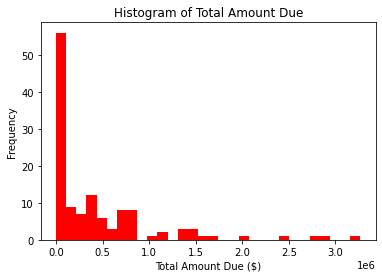

In [13]:
# Histogram of total taxes collected (2019 -2022)
plt.hist(round(dfsum['Total Amount Due'],0), 30, log = False, color='r')
plt.title("Histogram of Total Amount Due")
plt.xlabel("Total Amount Due ($)")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

###***In general, businesses pay taxes monthly or quarterly.  Let's double check this is true for this dataset.***

In [14]:
# Sum of taxes By name
dfsumf = df2.groupby(['Name', 'Filing Frequency']).sum()
dfsumf= dfsumf.drop(columns=removcol0)


In [15]:
#Convert Series into dataframe
dfsumdataframe = dfsumf.reset_index()


In [16]:
# Are there any companies/individuals paying their taxes Monthly and Quarterly?
#Create contingency table
pd.crosstab(index=dfsumdataframe['Name'], columns=dfsumdataframe['Filing Frequency'])

Filing Frequency,M,Q
Name,,
5520 Wisconsin Assoc,1,0
"7359 Wisconsin Avenue, LLC",1,0
"A-TBC Bethesda Owner, LLC dba Doubletree Bethesda Hotel",1,0
AIL Hospitality LLC dba Radisson Hotel,1,0
AIL Hospitality LLC dba Sleep Inn Hotel,1,0
...,...,...
Viktoria Ana D Partalozova,1,0
Wellness Hospitality,1,0
Worldwide Corporate Housing LP,1,0


# The following hotels switched their filing frequency at one point.


In [17]:
print(dfsumdataframe[dfsumdataframe.duplicated(subset=['Name'],keep=False)])

                                              Name Filing Frequency  \
8                                Amani Elkassabany                M   
9                                Amani Elkassabany                Q   
15                    Basic Overnight Quarters LLC                M   
16                    Basic Overnight Quarters LLC                Q   
47                      Eden Park Guest House, LLC                M   
48                      Eden Park Guest House, LLC                Q   
51                  Elizabeth Canterbury Homeowner                M   
52                  Elizabeth Canterbury Homeowner                Q   
65   Hoft Properties, LLC DBA Even Hotel Rockville                M   
66   Hoft Properties, LLC DBA Even Hotel Rockville                Q   
84                                  Karuna Skariah                M   
85                                  Karuna Skariah                Q   
92                                 Moonshot Global                M   
93    

# **Top 10 Hotel that paid the most taxes between 2019 and 2022**

In [18]:
df10 = dfsum.nlargest(10, ['Total Amount Due']).groupby('Name').sum()
#removcol0= ['Month','Quarter','Year']
#df10= df10.drop(columns=removcol0)
df10.head(10)

,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due
Name,,,,,
Airbnb Inc,39972490.53,2798074.10,0.0,0.0,2798074.10
Bethesda Hotel Associates LLC,20476940.23,1433385.62,0.0,0.0,1433385.62
Bethesda Marriott #33728,34788364.57,2435185.36,0.0,0.0,2435185.36
Bethesda North Marriott Hotel & Conference Center #337V9,41333515.71,2893345.92,0.0,0.0,2893345.92
Courtyard by Marriott Gaithersburg Washingtonian Center #311DQ,20950050.15,1466503.32,0.0,0.0,1466503.32
DHM Rockville LLC,23421748.47,1639522.15,0.0,0.0,1639522.15
Fallsgrove Hotel Associates LLC,20293327.95,1420532.88,0.0,0.0,1420532.88
Gaithersburg Marriott Washingtonian Center #337K6,28216828.69,1975177.76,0.0,0.0,1975177.76
Residence Inn by Marriott Bethesda Downtown #57136,23136388.30,1619546.98,0.0,0.0,1619546.98


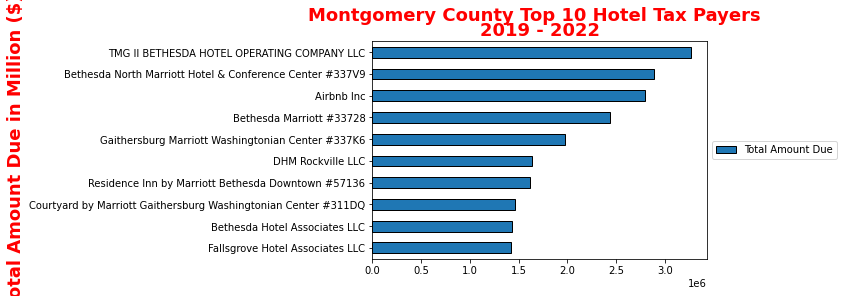

In [19]:
#df.loc[df['Year'] =='2022'].groupby('Name').sum().sort_values(by=['Total Amount Due']).head(10).plot(kind="bar")
removcol= ['Taxable Amount', 'Tax Due', 'Interest', 'Penalty']
df10a= df10.drop(columns=removcol)
df10a.sort_values(by=['Total Amount Due'],ascending = True).plot(kind="barh", edgecolor='black')

plt.suptitle("Montgomery County Top 10 Hotel Tax Payers",fontsize=18, y=1, fontweight='bold', color='red')
plt.title("2019 - 2022", fontsize = 18, fontweight='bold', color ='red' )
plt.ylabel("Total Amount Due in Million ($)", fontweight='bold',fontsize=18, color ='red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.show()

# **What is the average tax paid per hotels per year (2019 - 2022?**

In [20]:
dfavera = df2.groupby(['Name', 'Year'])['Total Amount Due'].sum()
dfavera1=dfavera.reset_index()
dfavera2 = round(dfavera1.groupby(['Name'])['Total Amount Due'].mean(), 2)
dfavera2=dfavera2.reset_index()
dfavera3 = dfavera2.nlargest(10, ['Total Amount Due'])
dfavera3.head(10)

,Name,Total Amount Due
112,TMG II BETHESDA HOTEL OPERATING COMPANY LLC,817388.20
83,Marriott Bethesda Downtown #33816,768663.12
20,Bethesda North Marriott Hotel & Conference Cen...,723336.48
7,Airbnb Inc,699518.52
18,Bethesda Marriott #33728,608796.34
52,Gaithersburg Marriott Washingtonian Center #337K6,493794.44
113,The Bethesdan Hotel,465532.15
105,Sage Client 227 LLC,456436.96
0,5520 Wisconsin Assoc,420160.62
32,DHM Rockville LLC,409880.54


# **How did Covid affect Hotel Tax revenues for Montgomery County?**

In [21]:

dfsumy = df2.groupby(['Year']).sum()
removcol1= ['Month','Quarter','Taxable Amount', 'Tax Due', 'Interest', 'Penalty']
dfsumy1= dfsumy.drop(columns=removcol1)
dfsumy1.head()


,Total Amount Due
Year,
2019,20402389.56
2020,7097272.77
2021,10179168.12
2022,16390031.20


###*Total tax due (collected) from 2019 - 20222*

In [22]:
# Total Amount Due from 2019 Thru 2022
print('The total amount due from 2019 thru 2022:', round(dfsumy1['Total Amount Due'].sum(),2))

The total amount due from 2019 thru 2022: 54068861.65


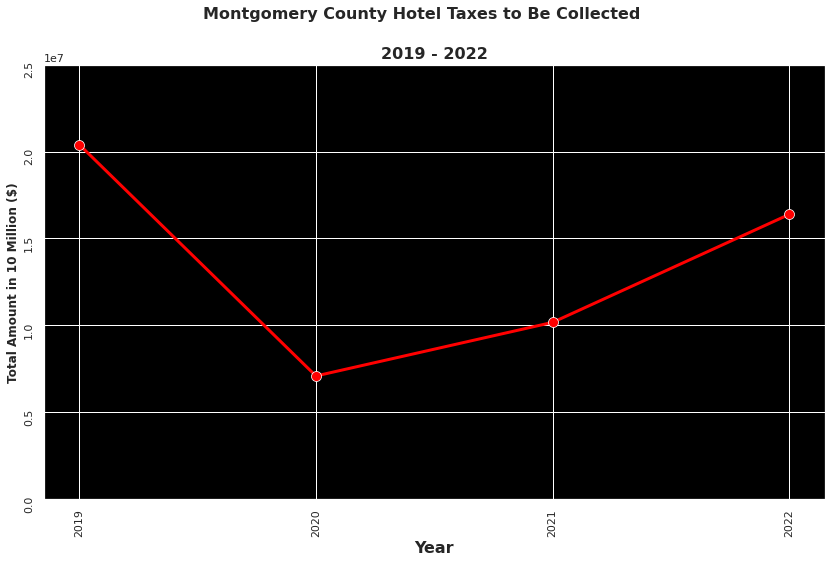

In [23]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

labels = [2019, 2020, 2021, 2022]
ylabels = [0,5000000,10000000,15000000,20000000,25000000]

ax = sns.lineplot(data=dfsumy1, x ='Year', y = 'Total Amount Due',                
                  legend='full', lw=3, color='red', marker='o', markersize=10)

ax = plt.gca()
ax.set_facecolor("black")
ax.patch.set_alpha(1.0)

plt.suptitle("Montgomery County Hotel Taxes to Be Collected",fontsize=16,fontweight='bold')
plt.title("2019 - 2022", fontsize = 16,fontweight='bold')
plt.ylabel("Total Amount in 10 Million ($)", fontweight='bold')
plt.xticks(labels, rotation='vertical')
plt.yticks(ylabels, rotation='vertical')
plt.xlabel('Year', fontsize=16,fontweight='bold')
plt.grid(True)
plt.show()

# **What happened to Airbnb Tax revenue During the Pandemic?**

In 2016, Airbnb has reached an agreement with Montgomery County to start collecting a hotel tax on behalf of its hosts.By working with local governments to collect hotel taxes, Airbnb is also showing that it is committed to being a good corporate citizen and contributing to the communities in which it operates. These taxes are often used to support tourism, infrastructure, and other public services in the community.

In [24]:
# Airbnb
dfsumya= df2.loc[df2['Name']=='Airbnb Inc']
dfsumya = dfsumya.groupby(['Year']).sum()
removcol1= ['Month','Quarter','Taxable Amount', 'Tax Due', 'Interest', 'Penalty']
dfsumy2= dfsumya.drop(columns=removcol1)
dfsumy2.head()

,Total Amount Due
Year,
2019,692545.88
2020,401846.97
2021,687932.71
2022,1015748.54


In [25]:
# Airbnb Total Amount Due from 2019 Thru 2022
print('From 2019 thru 2022 the total amount of taxes collected by Montgomery county from Airbnb is:', round(dfsumy2['Total Amount Due'].sum(),2))

From 2019 thru 2022 the total amount of taxes collected by Montgomery county from Airbnb is: 2798074.1


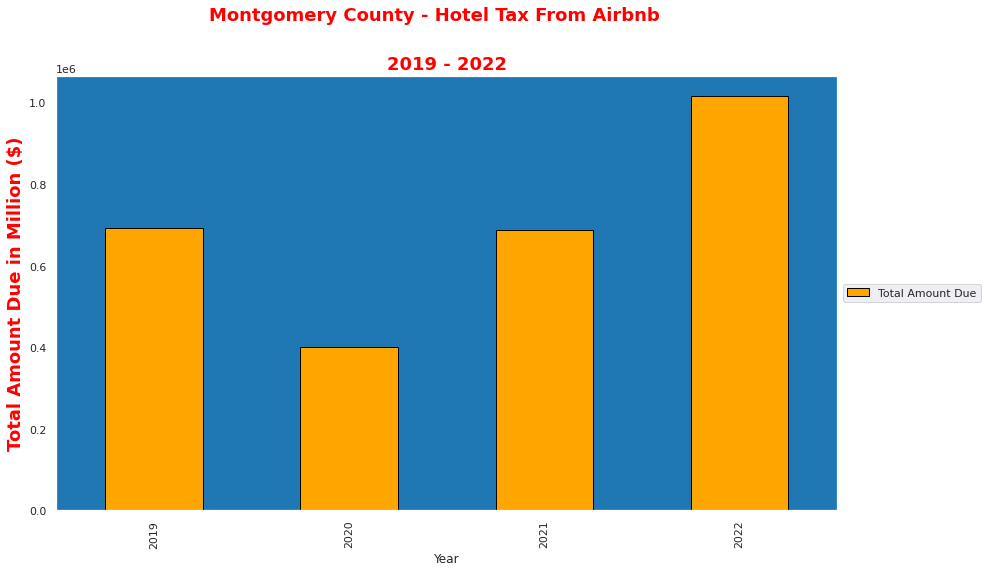

In [26]:
dfsumy2.sort_values(by=['Year'],ascending = True).plot(kind="bar", edgecolor='black', color='orange')

ax = plt.gca()
ax.set_facecolor("#1f77b4")
ax.patch.set_alpha(1.0)

plt.suptitle("Montgomery County - Hotel Tax From Airbnb",fontsize=18, y=1, fontweight='bold', color='red')
plt.title("2019 - 2022", fontsize = 18, fontweight='bold', color ='red' )
plt.ylabel("Total Amount Due in Million ($)", fontweight='bold',fontsize=18, color ='red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.show()

The above map does not show any surprises.  Taxes revenue from Airbnb in Montgomery county fell accross Montgomery County, MD to about 42%.

# **Were there any hotels that went out of business during the pandemic?** 
# **Were there any new hotels that were added during the pandemic?** 

In [48]:
#First let's create a dataframe with all the hotels that existed prior the pandemic
df2019=df[df["Year"] == 2019] 
df2019['Name'].nunique()


96

In [ ]:
list(set(df2019['Name']))

In [49]:
#Create a dataframe with all hotels that existed in 2020
df2020=df[df["Year"] == 2020] 
df2020['Name'].nunique()

83

In [ ]:
list(set(df2020['Name']))

In [50]:
#Create a dataframe with all hotels that existed in 2020
df2021=df[df["Year"] == 2021] 
df2021['Name'].nunique()

85

In [ ]:
list(set(df2021['Name']))

In [51]:
#Create a dataframe with all hotels that existed in 2020
df2022=df[df["Year"] == 2022] 
df2022['Name'].nunique()

84

In [ ]:
list(set(df2022['Name']))

*Hotels that disapeared in 2020*

In [53]:
remaininglist_names = list(set(df2019['Name']) - set(df2020['Name']))
remaininglist_names

['Eden Park Guest House, LLC',
 'Jamie Winestone',
 'Jane Hall',
 'Nicole Schmitt',
 'Amani Elkassabany',
 'airbnb',
 'Pauline Rubinstein',
 'Karuna Skariah',
 'Short Term Residential Rental',
 'Richard & Varda Nowitz',
 'ANNESWAY CONSULTING GROUP, LLC',
 'Motel 6 #1489',
 'KENWOOD GOLF & COUNTRY CLUB',
 'Nonye Uddoh',
 'Best Western Hotel',
 'Nancy Cedar',
 'Charles Oliver',
 'Jennifer A. Lukas',
 'Robert Bishop',
 'Homewood Suites']

*Hotels that were added in 2020*

In [63]:
remaininglist_namesA = list(set(df2020['Name']) - set(df2019['Name']))
remaininglist_namesA

['Elizabeth Canterbury Homeowner',
 'Renoca',
 'Wellness Hospitality',
 'Khatuna Khvichia',
 'patricia mirsky',
 'BEST WESTERN PLUS ROCKVILLE',
 'Michael Morris']

*Hotels that disapeared in 2021*

In [56]:
remaininglist_names2 = list(set(df2020['Name']) - set(df2021['Name']))
remaininglist_names2

['Elizabeth Canterbury Homeowner',
 'Renoca',
 '5520 Wisconsin Assoc',
 'Wellness Hospitality',
 'patricia mirsky',
 'Worldwide Corporate Housing LP']

*Hotels that were added in 2021*

In [64]:
remaininglist_names2A = list(set(df2021['Name']) - set(df2020['Name']))
remaininglist_names2A

['LCOF Silver Spring Operating, LLC',
 'Daniel Greenspan Airbnb',
 'T-R 1775 Rockville Owner LLC dba Rockville Even Hotel',
 'INK Lessee, LLC DBA Sheraton Rockville',
 'The Oaks',
 'Courtyard by Marriott Bethesda/Chevy Chase',
 'Des Affiches Bed and Breakfast',
 'Cambria Hotel Rockville']

*Hotels that disapeared in 2022*

In [58]:
remaininglist_names3 = list(set(df2021['Name']) - set(df2022['Name']))
remaininglist_names3

['Egencia LLC',
 'Hampton Inn Silver Spring',
 'Homewood Suites Silver Spring',
 'Daniel Greenspan Airbnb',
 'Patrick Edward Chapman',
 'Dini Sari Djalal',
 'Duball Rockville LLC dba Cambria Rockville',
 'Khatuna Khvichia',
 'Island Hospitality Management LLC - Residence Inn Gaithersburg',
 'Des Affiches Bed and Breakfast',
 'Island Hospitality Management - Sheraton Rockville Hotel',
 'Hoft Properties, LLC DBA Even Hotel Rockville',
 'Orbitz, LLC',
 'The Oaks',
 'Michael Morris']

*Hotels that were added in 2022*

In [60]:
remaininglist_names4 = list(set(df2022['Name']) - set(df2021['Name']))
remaininglist_names4

['Richard Rodrigues',
 'Grand Prix Fixed Lessee LLC DBA RI Gaithersburg',
 '7359 Wisconsin Avenue, LLC',
 'Elizabeth Burgess',
 'The Bethesdan Hotel',
 'Sophia Jafrul',
 'Viktoria Ana D Partalozova',
 'Marriott Bethesda Downtown #33816',
 'United Corporate Housing',
 'Moonshot Global',
 'Sage Client 227 LLC',
 'EVOLVE VACATION RENTAL NETWORK INC',
 'Annika Hamann',
 'Headwaters Farm']

# **What are the hotels that paid the most penalties from 2019 to 2022?**

In [27]:
dfpenalty = dfsum.nlargest(10, ['Penalty']).groupby('Name').sum()
#removcol0= ['Month','Quarter','Year']
#df10= df10.drop(columns=removcol0)
dfpenalty.head(10)

,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due
Name,,,,,
AIL Hospitality LLC dba Radisson Hotel,7323949.88,512676.27,282.76,1413.82,514372.87
Best Western Hotel,1458177.03,102072.36,3199.26,11720.79,116992.45
Fairfield Inn & Suites - Germantown,8157453.61,571021.51,163.45,817.25,572002.22
"GAI Enterprises, LLC. DBA - Motel 6",5568450.63,389791.32,189.23,946.20,390926.76
Hampton Inn & Suites,10424926.92,729744.65,188.82,944.13,730877.61
Homewood Suites Silver Spring,5169158.94,361840.98,200.09,1000.50,363041.59
"INK Lessee, LLC DBA Sheraton Rockville",4053322.07,283732.45,13337.21,37871.97,334941.64
RGALTD T/A Comfort Inn,7601030.78,532072.01,449.75,2248.78,534770.55
"Rockville Hospitality, LLC",10667457.74,746721.78,185.15,925.75,747832.69


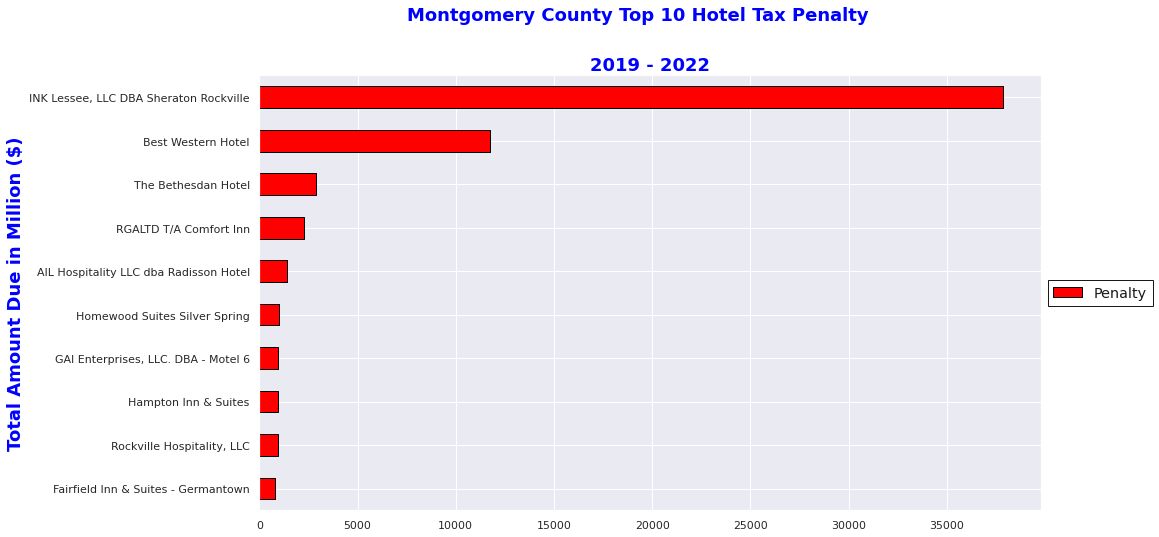

In [28]:
removcol= ['Taxable Amount', 'Tax Due', 'Interest', 'Total Amount Due']
dfpenaltya= dfpenalty.drop(columns=removcol)
dfpenaltya.sort_values(by=['Penalty'],ascending = True).plot(kind="barh", edgecolor='black', color='red')

plt.style.use('classic')

#ax = plt.gca()
#ax.set_facecolor("#7FFFD4")
#ax.patch.set_alpha(1.0)

plt.suptitle("Montgomery County Top 10 Hotel Tax Penalty",fontsize=18, y=1, fontweight='bold', color='blue')
plt.title("2019 - 2022", fontsize = 18, fontweight='bold', color ='blue' )
plt.ylabel("Total Amount Due in Million ($)", fontweight='bold',fontsize=18, color ='blue')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [29]:
# Complete list of Hotels that paid penalty between 2019 - 2022
dfpenaltycount = df2.groupby('Name').sum()
removcol0= ['Month','Quarter','Year']
dfpenaltycount= dfpenaltycount.drop(columns=removcol0)
dfpenaltycount=dfpenaltycount.reset_index()
dfpenaltycountq=dfpenaltycount.loc[dfpenaltycount['Penalty'] > 0]
#dfpenaltycountq.head()
psum= round(np.sum(dfpenaltycountq['Penalty']), 2)
isum= round(np.sum(dfpenaltycountq['Interest']), 2)

print(dfpenaltycountq.shape[0],  "of the 125 hotels paid a total penalty of", psum, "and a total of interest of"
, isum)
dfpenaltycountq.head(27)

27 of the 125 hotels paid a total penalty of 64495.49 and a total of interest of 19606.56


,Name,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due
0,5520 Wisconsin Assoc,11999117.67,839938.17,63.84,319.23,840321.25
3,AIL Hospitality LLC dba Radisson Hotel,7323949.88,512676.27,282.76,1413.82,514372.87
4,AIL Hospitality LLC dba Sleep Inn Hotel,5039427.09,352759.65,137.41,687.08,353584.16
9,American Inn Bethesda,4977462.34,348422.18,79.56,397.81,348899.55
13,BW RRI III,12332050.92,863243.35,132.32,661.62,864037.31
16,Best Western Hotel,1458177.03,102072.36,3199.26,11720.79,116992.45
25,Churchill Corporate Services Inc,290533.83,20337.33,32.62,163.14,20533.10
28,Courtyard by Marriott Bethesda/Chevy Chase,10189720.19,713280.31,115.98,579.92,713976.22
33,Daniel Greenspan Airbnb,7192.03,503.43,53.98,125.86,683.27
34,Des Affiches Bed and Breakfast,675.00,47.25,7.56,11.81,66.62


**How many times each of these hotels were charged penalties?**


In [30]:
dfpenaltycountfilter=df2.loc[df2['Penalty'] > 0]
dfpenaltycountfilter.shape[0]
removcol2= ['Month','Quarter','Year', 'Filing Frequency', 'Due Date', 'Taxable Amount', 'Tax Due', 'Interest','Total Amount Due']
dfpenaltycountfilter= dfpenaltycountfilter.drop(columns=removcol2)
filterresult = dfpenaltycountfilter.groupby(['Name']).count()
#filterresult.shape
filterresult.head(27)

,Penalty
Name,
5520 Wisconsin Assoc,1
AIL Hospitality LLC dba Radisson Hotel,2
AIL Hospitality LLC dba Sleep Inn Hotel,2
American Inn Bethesda,1
BW RRI III,1
Best Western Hotel,3
Churchill Corporate Services Inc,1
Courtyard by Marriott Bethesda/Chevy Chase,1
Daniel Greenspan Airbnb,3


#***What is the Filing Frequency for the hotels that paid penalties?***

In [31]:
#dfpenaltycountfilter['Filing Frequency'].value_counts()
dfp1=df2.loc[df2['Penalty'] > 0]
removcol3= ['Month','Quarter','Year']
dfp1= dfp1.drop(columns=removcol3)
dfp1.head()
dfp2=dfp1.groupby(['Name', 'Filing Frequency']).sum()
dfp2=dfp2.reset_index()
dfp2.head()
dfp2['Name'].nunique()
dfp2['Filing Frequency'].value_counts()
#list_names = list(set(dfpenaltycountfilter['Name']))
#list_names

M    25
Q     2
Name: Filing Frequency, dtype: int64

The above shows that most hotels that paid late (25 of 27) had chosen to pay their taxes on a monthly basis.  This suggests that perhaps that "Filing Frequency" plays a role in whether a hotel pays penalty.

# **Building a model**

**Use scikit-learn logistic regression to train, test and predict Penalty.**


Train Test Split: Creating and Training a Model in Scikit-Learn

#Getting dataset ready 

In [32]:
# Arrange the data into features and target
dfsumodel = dfsumf.reset_index()

dfsumodel.head()
dfsumodel.shape

(134, 7)

In [33]:
# Adding a new column using the np.select() function
# create a list of our conditions
conditions = [
    (dfsumodel['Penalty'] == 0.00),
    (dfsumodel['Penalty'] > 0) 
    ]

# create a list of the values we want to assign for each condition
values = [0,1]

# create a new column and use np.select to assign values to it using our lists as arguments
dfsumodel['Outcome'] = np.select(conditions, values)




In [34]:
# Replace Filing Frequency Values with Numbers
# Adding a new column using the np.select() function
# create a list of our conditions
conditions = [
    (dfsumodel['Filing Frequency'] == 'M'),
    (dfsumodel['Filing Frequency'] == 'Q') 
    ]

# create a list of the values we want to assign for each condition
values = [0,1]

# create a new column and use np.select to assign values to it using our lists as arguments
dfsumodel['Mode'] = np.select(conditions, values)

dfsumodel.head(5)

,Name,Filing Frequency,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due,Outcome,Mode
0,5520 Wisconsin Assoc,M,11999117.67,839938.17,63.84,319.23,840321.25,1,0
1,"7359 Wisconsin Avenue, LLC",M,2340139.48,163809.74,0.00,0.00,163809.74,0,0
2,"A-TBC Bethesda Owner, LLC dba Doubletree Bethe...",M,15686991.14,1098089.23,0.00,0.00,1098089.23,0,0
3,AIL Hospitality LLC dba Radisson Hotel,M,7323949.88,512676.27,282.76,1413.82,514372.87,1,0
4,AIL Hospitality LLC dba Sleep Inn Hotel,M,5039427.09,352759.65,137.41,687.08,353584.16,1,0


In [35]:
dfsumodel.shape

(134, 9)

#Selecting Features and Test/Train

In [36]:
features = [ 'Mode']
X = dfsumodel.loc[:,features]
target = ['Outcome']
y = dfsumodel.loc[:, target]

In the code below, train_test_split splits the data and returns a list which contains four NumPy arrays, while train_size = .70 puts 70 percent of the data into a training set and the remaining 30 percent into a testing set.

In [37]:
#Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [38]:
# Shows the number of rows and columns for each variable
X_train.shape, y_train.shape

((93, 1), (93, 1))

In [39]:
X_test.shape, y_test.shape

((41, 1), (41, 1))

#Instantiate, preprocess, train, and predict (test)

In [40]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print('Classes', LogReg.classes_)
print("")
print('Intercept',LogReg.intercept_)
print("")
print("Coefficients", LogReg.coef_ )

Classes [0 1]

Intercept [-1.54783799]

Coefficients [[-0.40748286]]


#Accuracy Score and Classification Report

In [42]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.7560975609756098
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        31
           1       0.00      0.00      0.00        10

    accuracy                           0.76        41
   macro avg       0.38      0.50      0.43        41
weighted avg       0.57      0.76      0.65        41



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[31,  0],
       [10,  0]])

Text(0.5, 24.999999999999986, 'Predicted label')

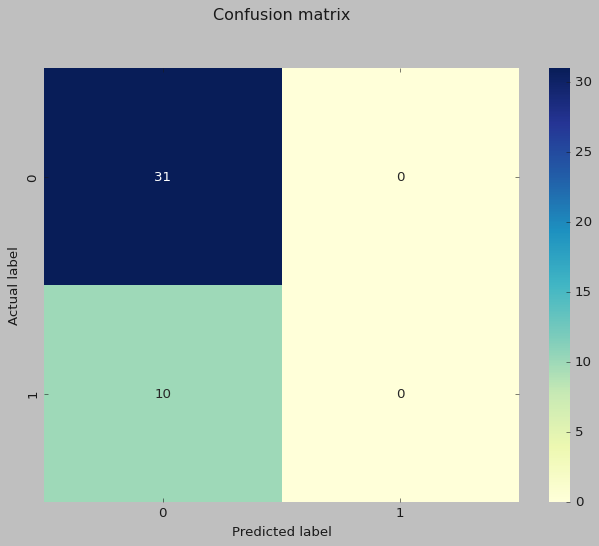

In [44]:
# Create chart for confusion matrix
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

True Positive (TP) which refers to a sample belonging to the positive class being classified correctly.

The True Negative (TN) refers to a sample belonging to the negative class being classified correctly.

The False Positive (FP) refers to a sample belonging to the negative class but being classified wrongly as belonging to the positive class.

The False Negative (FN) refers to a sample belonging to the positive class but being classified wrongly as belonging to the negative class.

# **Conclusion**

Overall, our model has a decent accuracy score of 0.7.  This also suggests that businesses that are paying taxes monthly are more likely to incur penalties. 
In addition, hotels worldwide have struggled to stay open during the pandemic and the ones in Montgomery county were no exception. In fact, we have observed that a few hotels were closed during the pandemic. However, because some new ones were also added, it’s hard to say for sure covid-19 was the main factor of these closures - at least based on this dataset.  Nonetheless, hotel taxes revenues have increased in Montgomery County as economies rebounded from the pandemic.
